<a href="https://colab.research.google.com/github/gollabharadwaj/python/blob/main/ML_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd

Accuracy on original dataset: 1.0
Accuracy with 1 feature(s): 0.8888888888888888
Accuracy with 2 feature(s): 0.9111111111111111
Accuracy with 3 feature(s): 1.0
Accuracy with 4 feature(s): 1.0
Accuracies: [0.8888888888888888, 0.9111111111111111, 1.0, 1.0]


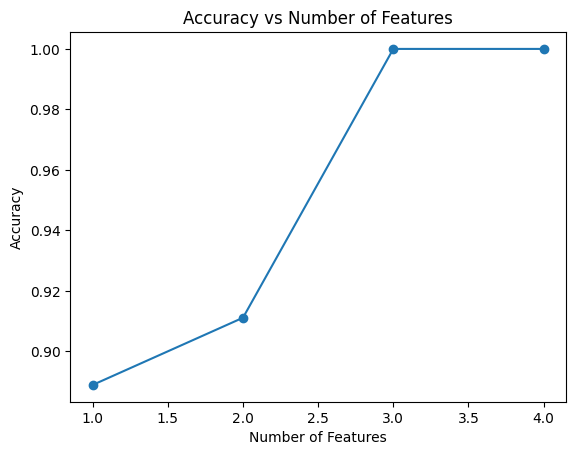

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
iris = pd.read_csv('/content/iris.csv')

X = iris.iloc[:, :-1].values # standardization
y = iris['variety'].values

X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier  # decision tree classifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
original_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy on original dataset:", original_accuracy)

# PCA
def pca(X, n_components):

    cov_matrix = np.cov(X.T)  #covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # eigen values and eigen vectors

    # Sort eigenvalues and corresponding eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    eigenvalues = eigenvalues[idx]

    # Choose the top k eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    X_pca = np.dot(X, top_eigenvectors)

    return X_pca, eigenvalues, top_eigenvectors

num_features = X.shape[1]
accuracies = []

for n in range(1, num_features + 1):
    X_train_pca, _, top_eigenvectors = pca(X_train, n)
    X_test_pca = np.dot(X_test, top_eigenvectors)

    clf_pca = DecisionTreeClassifier()
    clf_pca.fit(X_train_pca, y_train)
    accuracy = accuracy_score(y_test, clf_pca.predict(X_test_pca))
    accuracies.append(accuracy)
    print("Accuracy with", n, "feature(s):", accuracy)

print("Accuracies:", accuracies)

plt.figure()
plt.plot(range(1, num_features + 1), accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.show()
